# 2. 인공지능과 가위바위보 하기 [프로젝트]
## 2-1. 미니 프로젝트 : 가위바위보 분류기를 만들자
지난 시간 배운 내용을 바탕으로 가위바위보 분류기를 만들도록 하겠습니다.<br>
가장 먼저 해야 할 일은 뭘까요? 네, 첫 번째!!!! 데이터를 준비해야 합니다.<br>
가위바위보 이미지를 모아 놓은 곳은 없으므로, 우리가 직접 사진을 찍어서 모아봅시다.

**라이브러리 버전을 확인해 봅니다**

------------------------------------
사용할 라이브러리 버전을 둘러봅시다.

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


**데이터를 준비하자**

🔶 데이터 만들기<br>
(1) 우리는 노트북 전면 카메라를 활용하여 가위, 바위, 보 이미지 각 100장을 만들어 볼거예요. 그런데 300장을 어느 세월에 만들까요?<br>
걱정하지 마세요. 구글의 teachable machine 사이트에서 쉽게 데이터를 만들어볼 수 있습니다. 아래 사이트에서 Get Started 버튼을 눌러보세요. 그 다음, Image Project - Standard image model을 선택하면, Webcam을 구동해 클래스별 이미지 데이터를 직접 촬영해서 만들 수 있는 멋진 화면이 나타납니다.

https://teachablemachine.withgoogle.com/

(2) 먼저 가위 이미지 데이터를 만들어 봅시다. 웹캠 앞에 가위 포즈를 취하면서 <Hold to Record> 버튼을 누르면 이미지가 캡쳐됩니다. 딥러닝 모델이 인식하기 좋게끔 여러분들 손이 잘 보이게 찍어주세요.
- 여러 각도에서 찍어보세요.
- 여러 크기로 찍어보세요.
- 혼자하면 다양한 각도와 크기를 저장할 수 없으니, 옆 동료와 함께 하세요.
- 좋은 데이터가 좋은 결과를 낳는다는 것을 꼭 기억하세요.

(3) 100장의 가위 이미지를 캡쳐했다면, 우상단의 메뉴 아이콘을 눌러 다운로드 합니다.

(4) 가위 이미지들을 "scissor.zip"이라는 파일 이름으로 본인 컴퓨터에 저장해주세요. 바위와 보 이미지들에 대해서도 위 과정을 진행하세요. (각각 "rock.zip", "paper.zip" 이름으로 저장해주세요.)

🔶 디렉토리 만들기<br>
이제 클라우드에 실습용 디렉토리 rock_scissor_paper 및 하위 디렉토리들을 만들어, 데이터셋을 올릴 차례입니다!

> 토막 리눅스 사용법
> mkdir -p : mkdir를 사용하여 하위 디렉토리를 생성할때 차례대로 만들지 않고 중간 디렉토리 없이 바로 그 다음 하위 디렉토리를 만들게되면 "디렉토리를 생성할 수 없습니다." 라는 메시지가 나오는데, -p 옵션을 주어 생성하게 되면 자동으로 중간 단계의 디렉토리를 생성하면서 그 하위 디렉토리를 생성하게 됩니다.

☁️ 이미지 업로드 방법
1. 오른쪽 메뉴에서 Cloud Jupyter를 열어주세요.
2. rock.zip을 올리고 싶다면 rock_scissor_paper/rock 디렉토리로 이동 후, Upload버튼을 눌러주세요. 드래그 앤 드롭도 가능합니다.
3. 가위와 보 데이터셋에 대해서도 위 과정을 진행해주세요.
여기까지 성공하셨다면 아래와 같은 구조를 갖고 있을 것입니다.

클라우드 이미지 압축 해제
압축 해제를 하려면 Cloud shell을 열고 아래 명령어를 입력해주세요.

Q. 다운로드 받은 이미지는 크기는 무엇일까요? "nxn"(n은 정수)의 형태로 나타내 보세요.<br>
224x224

**데이터 불러오기 + Resize 하기**

(5) 숫자 손글씨의 경우 이미지 크기가 28x28 이었기 때문에, 우리의 가위, 바위, 보 이미지도 28x28로 만들어야 합니다. 이를 위해서는 PIL 라이브러리를 사용해볼 거예요. 그러려면 먼저 라이브러리를 불러와야 겠죠?

In [2]:
from PIL import Image 
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [3]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
image_dir_path = "/aiffel/aiffel/09_deeplearning/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


자 그러면, 바위 이미지도 28x28 로 만들어 볼까요? 아래 빈 칸에 코드를 작성하고, 실행해보세요. 바위 이미지가 모두 28x28로 바뀌어야 합니다.

In [4]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]
image_dir_path = "/aiffel/aiffel/09_deeplearning/rock_scissor_paper/rock"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


마지막으로 보 이미지도 28x28로 만들어 봅시다.

In [5]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]
image_dir_path = "/aiffel/aiffel/09_deeplearning/rock_scissor_paper/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


(6) 숫자 손글씨 인식기는 `mnist.load_data()` 라는 함수로 데이터를 읽었던 것 기억하시죠? 여러분들이 아직 코딩에 익숙하지 않을 수 있으므로, 가위, 바위, 보 데이터를 읽을 수 있는 `load_data()` 함수를 만들어 드릴 거예요. 이 코드를 활용하면 임의의 사진 데이터(ex. 귤이 잘 익었나, 안 익었나? 웃는 얼굴인가, 우는 얼굴인가, 평범한 표정의 얼굴인가? 등)에 적용하실 수 있을 겁니다.

`load_data()` 함수는 입력으로 이미지가 있는 폴더 위치를 받습니다. 여기서는 rock_scissor_paper 폴더 위치를 적어주면 됩니다. 숫자 손글씨는 0~9 까지의 클래스가 있었던 것 기억하시죠? 가위바위보의 경우 3개의 클래스 즉, **가위: 0, 바위: 1, 보: 2** 로 라벨링이 될 것입니다.

In [6]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

# image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
image_dir_path = os.getenv("HOME") + "/aiffel/09_deeplearning/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


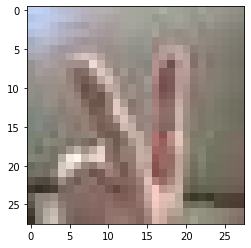

In [7]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

**딥러닝 네트워크 설계하기**

---------------------------------
자 이제 데이터의 준비가 끝났습니다. 이제 여러분들이 가위바위보를 인식하는 딥러닝 네트워크를 설계해 볼까요?

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3))) # 입력 크기 28x28x3
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax')) # 가위, 바위, 보 3개의 클래스

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

가위바위보 데이터셋과 MNIST 데이터셋의 주요 차이점은 데이터 형태와 채널 수임. MNIST는 (28, 28, 1) 모양의 흑백 이미지 데이터인 반면, 가위바위보 데이터셋은 (28, 28, 3) 크기의 컬러 이미지 데이터로 보고 다음 사항을 고려해야 함

입력 크기: 모델의 입력은 데이터 크기인 (height, width, channels)와 동일해야 함. 64x64x3 형태로 이미지를 처리하는 모델을 설계
출력 클래스 수: 가위, 바위, 보 3개의 클래스가 있으므로 모델의 출력층은 3개의 뉴런으로 설정하고, softmax 활성화 함수를 사용
모델 구조: 컨볼루션 신경망(CNN)을 사용하여 이미지 데이터의 특징을 추출

**딥러닝 네트워크 학습시키기**

----------------------------------
잘 설계가 되었다면, 이제 학습을 시켜봅시다. 아마도 여러분들의 데이터는 거의 비슷비슷할 것이기 때문에 accuracy가 꽤 높게 나올 것입니다.

In [9]:
# model을 학습시키는 코드를 직접 작성해 보세요. 
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/10
10/10 [==============================] - 1s 23ms/step - loss: 18.5888 - accuracy: 0.3833
Epoch 2/10
10/10 [==============================] - 0s 22ms/step - loss: 3.4897 - accuracy: 0.5367
Epoch 3/10
10/10 [==============================] - 0s 22ms/step - loss: 2.2397 - accuracy: 0.6200
Epoch 4/10
10/10 [==============================] - 0s 23ms/step - loss: 1.1300 - accuracy: 0.7700
Epoch 5/10
10/10 [==============================] - 0s 20ms/step - loss: 0.3416 - accuracy: 0.8933
Epoch 6/10
10/10 [==============================] - 0s 22ms/step - loss: 0.1181 - accuracy: 0.9500
Epoch 7/10
10/10 [==============================] - 0s 26ms/step - loss: 0.0825 - accuracy: 0.9600
Epoch 8/10
10/10 [==============================] - 0s 23ms/step - loss: 0.0162 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 0s 23ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 26ms/step - loss: 0.0034 - accuracy: 1.0000


**얼마나 잘 만들었는지 확인하기(테스트)**

------------------------------------------------
여러분들은 300장의 가위바위보 이미지를 만들어 모두 학습에 사용했습니다. 그러므로 테스트 데이터가 없죠. 옆 친구의 이미지 데이터 300장을 받아오세요. 그리고 그것을 테스트 데이터로 하여 test accuracy를 측정해보세요. (만약 웹캠이 없는 경우 섹션을 진행하신 경우, 이미 test 데이터셋이 준비돼있으니 친구에게 조르지 않으셔도 됩니다)

In [10]:
# !mkdir -p ~/aiffel/09_deeplearning/rock_scissor_paper/test
# !cp -r ~/data/* ~/aiffel/09_deeplearning/rock_scissor_paper/test

우선 테스트용 데이터인 x_test, y_test를 만들어 봅시다.

In [11]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# [[YOUR CODE]]
image_dir_path = os.getenv("HOME") + "/aiffel/09_deeplearning/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/09_deeplearning/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/09_deeplearning/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/09_deeplearning/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


테스트용 데이터가 준비되었으니, 위에서 훈련시킨 model을 사용하여 test_accuracy를 측정해 봅시다.

In [12]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.7449 - accuracy: 0.6900
test_loss: 1.744889736175537 
test_accuracy: 0.6899999976158142


**더 좋은 네트워크 만들어보기**

-------------------------
시험용 데이터x_test에 대한 인식률 test accuracy가 train accuracy보다 많이 낮게 나오지는 않았나요? 만약 그렇다면 그 이유는 무엇일까요? MNIST 손글씨 데이터 때처럼 test accuracy가 train accuracy에 근접하도록 개선 방법을 찾아 봅시다.

**노드를 마치며...**

---------------------------
여러분 미니 프로젝트는 잘 마치셨나요? 여러분은 이번 노드를 통해 다음의 내용을 배웠습니다.
- 이미 잘 정제된 10개 클래스의 숫자 손글씨 데이터를 분류하는 classifier 만들기
- 정제되지 않은 웹캠 사진으로부터 데이터 만들어보기
- 흑백 사진이 아닌 컬러 사진을 학습하는 classifier 만들기
- 분류하고자 하는 클래스의 개수를 마음대로 조절하기 (10개에서 3개로)

그러면 오늘 배운 내용을 바탕으로 마스크 쓴 사람과 안 쓴 사람을 구분하는 프로젝트도 금방 만드실 수 있겠죠?

루브릭<br>
아래의 기준을 바탕으로 프로젝트를 평가합니다.

| 평가문항 | 상세기준 |
| ------ | ------ |
| 1. 이미지 분류기 모델이 성공적으로 만들어졌는가? | 학습과정이 정상적으로 수행되었으며, 학습 결과에 대한 그래프를 시각화(ex. train acc / train loss / val acc / val loss 등) 해 보았음 |
| 2. 오버피팅을 극복하기 위한 적절한 시도가 있었는가? | 오버피팅 극복을 위하여 데이터셋의 다양성, 정규화 등을 2가지 이상 시도해보았음 |
| 3. 분류모델의 test accuracy가 기준 이상 높게 나왔는가? | 85% 이상 도달하였음 |

위 기준에 따라 코드 추가

In [13]:
# 모델 설계
n_channel_1 = 32
n_channel_2 = 64
n_dense = 64
n_train_epoch = 20  # Epoch 증가

model = keras.models.Sequential([
    keras.layers.Conv2D(n_channel_1, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(n_channel_2, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Dropout(0.1),  # 오버피팅 방지용 Dropout
    keras.layers.Flatten(),
    keras.layers.Dense(n_dense, activation='relu'),
    keras.layers.Dropout(0.1),  # 추가 Dropout
    keras.layers.Dense(3, activation='softmax')
])

In [14]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),  # 적정 learning rate
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/20
10/10 [==============================] - 1s 42ms/step - loss: 25.3372 - accuracy: 0.3867
Epoch 2/20
10/10 [==============================] - 0s 41ms/step - loss: 2.3848 - accuracy: 0.5533
Epoch 3/20
10/10 [==============================] - 0s 42ms/step - loss: 0.8632 - accuracy: 0.7100
Epoch 4/20
10/10 [==============================] - 0s 38ms/step - loss: 0.4396 - accuracy: 0.8133
Epoch 5/20
10/10 [==============================] - 0s 39ms/step - loss: 0.2494 - accuracy: 0.9267
Epoch 6/20
10/10 [==============================] - 0s 38ms/step - loss: 0.1210 - accuracy: 0.9667
Epoch 7/20
10/10 [==============================] - 0s 36ms/step - loss: 0.1118 - accuracy: 0.9667
Epoch 8/20
10/10 [==============================] - 0s 37ms/step - loss: 0.0601 - accuracy: 0.9800
Epoch 9/20
10/10 [==============================] - 0s 39ms/step - loss: 0.0289 - accuracy: 0.9900
Epoch 10/20
10/10 [==============================] - 0s 38ms/step - loss: 0.0247 - accuracy: 0.9967
Epoch 11

In [15]:
image_dir_path = os.getenv("HOME") + "/aiffel/09_deeplearning/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/09_deeplearning/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/09_deeplearning/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/09_deeplearning/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [16]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.7680 - accuracy: 0.5133
test_loss: 1.7680232524871826 
test_accuracy: 0.5133333206176758


Epoch 1/20
8/8 [==============================] - 0s 49ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 2/20
8/8 [==============================] - 0s 45ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 4.8745e-04 - val_accuracy: 1.0000
Epoch 3/20
8/8 [==============================] - 0s 43ms/step - loss: 0.0229 - accuracy: 0.9958 - val_loss: 1.7155e-04 - val_accuracy: 1.0000
Epoch 4/20
8/8 [==============================] - 0s 44ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 3.0598e-04 - val_accuracy: 1.0000
Epoch 5/20
8/8 [==============================] - 0s 48ms/step - loss: 0.0157 - accuracy: 0.9917 - val_loss: 6.3848e-05 - val_accuracy: 1.0000
Epoch 6/20
8/8 [==============================] - 0s 45ms/step - loss: 0.0125 - accuracy: 0.9958 - val_loss: 1.2551e-04 - val_accuracy: 1.0000
Epoch 7/20
8/8 [==============================] - 0s 46ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 8

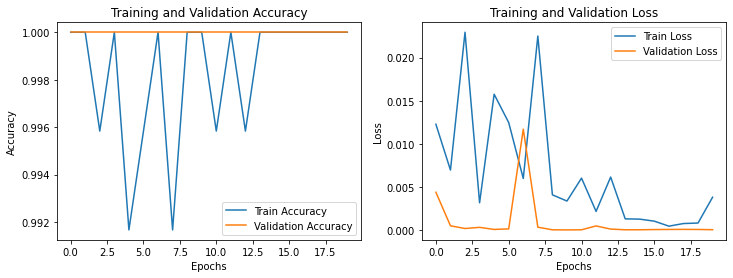

In [17]:
# 학습 과정 시각화를 위한 콜백 설정
history = model.fit(x_train, y_train, batch_size=32,
                    validation_split=0.2,  # Validation data 생성
                    epochs=n_train_epoch)

# 학습 결과 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

Accuracy의 향상을 보기 어려웠음.